hurra!

# iPython notebook - Mariana analysis - Events
Google Analytics data


## 1. Import libraries

In [1]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options


 2. Settings

In [2]:
# Time period 15th Jan - 26th April (arbitrary )

# API credentials
# Email address 705762800217-compute@developer.gserviceaccount.com
# Key IDs 948ee8e2a420ef14a5d5a29bd35104fe2f1e6ed4
 

In [1]:
# open file. It is requested via API explorer using request parameters:

#Account: TMRW Tech Hub
#Property: TMRW
#View: All Web Site Data
#ids: ga:123303369
#start-date: 2017-01-15
#end-date: yesterday

#metrics
#ga:sessions
#ga:sessionsWithEvent
#ga:bounceRate

#dimensions
#ga:deviceCategory

In [20]:
# Open file
TMRW_devices= pd.read_csv('http://localhost:8891/files/Desktop/ana/files/TMRW_mob_dev.csv')
#TMRW_devices

,ga:deviceCategory,ga:sessions,ga:bounceRate,ga:sessionsWithEvent
0,desktop,4061,52.647131,114
1,mobile,2261,62.627156,30
2,tablet,270,55.555556,3


In [35]:
# rename columns
TMRW_devices.columns=['Device','Sessions','Bounce Rate','Events'] 
TMRW_devices

,Device,Sessions,Bounce Rate,Events
0,desktop,4061,52.647131,114
1,mobile,2261,62.627156,30
2,tablet,270,55.555556,3


In [37]:
TMRW_devices_mob = TMRW_devices[TMRW_devices.Device == "mobile"]
TMRW_devices_mob

,Device,Sessions,Bounce Rate,Events
1,mobile,2261,62.627156,30


In [50]:
TMRW_devices_group = TMRW_devices.groupby(['Device']).mean()
TMRW_devices_group

,Sessions,Bounce Rate,Events
Device,,,
desktop,4061,52.647131,114
mobile,2261,62.627156,30
tablet,270,55.555556,3


In [61]:
data=TMRW_devices_group.loc[: , 'Events']
data

Device
desktop    114
mobile      30
tablet       3
Name: Events, dtype: int64

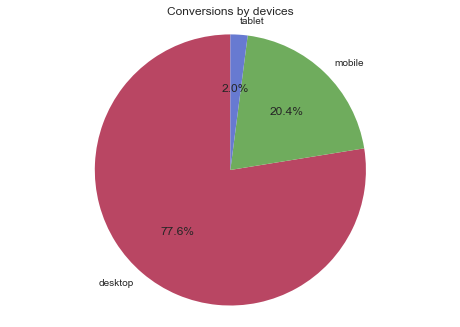

In [58]:
labels = data.index
sizes = data
# colours are taken from http://tools.medialab.sciences-po.fr/iwanthue/
colors = ['#b94663','#6fac5d', '#677ad1']
explode = (0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('Conversions by devices')
plt.show()
